<a href="https://colab.research.google.com/github/yuuOkada/Sphere_CNN/blob/master/Make_learning_predict_param.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time elapsed since Colab Instance was started: Shutdown in 0.5day(43200 second)

In [1]:
!cat /proc/uptime | awk '{print $1 /60 /60 /24 "days (" $1 "sec)"}'

0.025489days (2202.25sec)


Connect to Google Drive File Stream

In [2]:
from google.colab import drive
drive.mount('./gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at ./gdrive


Sequential CNN model Learning

Conv2D3-Dence3-Adadelta : *shape(90,110,3) , 8Class*

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 88, 108, 32)       896       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 44, 54, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 42, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 21, 26, 64)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 19, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 9, 12, 128)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 13824)           

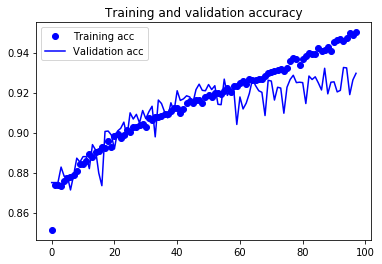

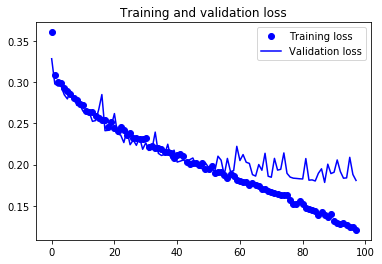

In [0]:
from PIL import Image
import os, glob
import time
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from tensorflow import keras
from keras.utils import np_utils
from keras import optimizers
from keras import layers, models
from keras.callbacks import EarlyStopping
from keras.utils import plot_model

#Pictures path
root_dir = "./gdrive/My Drive/Google Colab/CO191219_proj"
##Category Classes
categories = ["ceiling", "cloth", "floor", "floor-object","hole", "human", "object", "wall"]

#Define CNN-model
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(90,110,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(8, activation="sigmoid"))

#Define early-stopping
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto') 

#Show CNN-model
model.summary()

#Show CNN-model
plot_model(model, to_file=root_dir+'/model_Conv2D3-Dence3-Adadelta.png')

#Compile CNN-model
model.compile(loss="binary_crossentropy",
              optimizer=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
              metrics=["acc"])



#Prepare image-data
categories = ["ceiling", "cloth", "floor", "floor-object","hole", "human", "object", "wall"]
nb_classes = len(categories)

#Imput numpy-array
X_train, X_test, y_train, y_test = np.load(root_dir+"/img-data_90-110-3_8c.npy", allow_pickle=True)

#Image Normalization
X_train = X_train.astype("float") / 255
X_test  = X_test.astype("float")  / 255

#Convert categories to vector
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test  = np_utils.to_categorical(y_test, nb_classes)

start_time = time.time()

#Learning
model = model.fit(X_train,
                  y_train,
                  epochs=120,
                  batch_size=256,
                  verbose=1,
                  validation_data=(X_test,y_test),
                  callbacks=[early_stop])

stop_time = time.time()

elapsed_time = stop_time - start_time
print("Elapsed Time : " + str(elapsed_time) + "s")

#Show learning model
acc = model.history['acc']
val_acc = model.history['val_acc']
loss = model.history['loss']
val_loss = model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig(root_dir+'/acc_graph_Conv2D3-Dence3-Adadelta')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig(root_dir+'/loss_graph_Conv2D3-Dence3-Adadelta')

Sequential CNN model Learning

Conv2D3-Dence3-Adadelta : *shape(60,70,3) , 7-false8-Class*

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 58, 68, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 29, 34, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 29, 34, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 27, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 16, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 13, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 14, 128)      

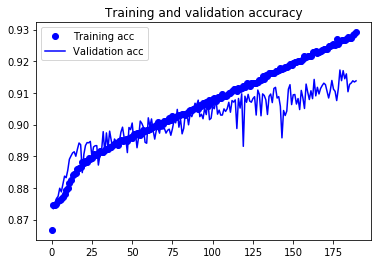

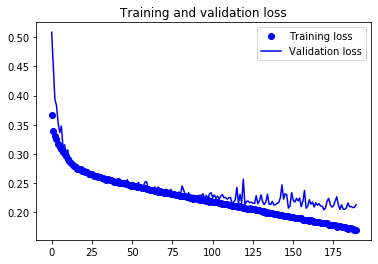

In [6]:
from PIL import Image
import os, glob
import time
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from tensorflow import keras
from keras.utils import np_utils
from keras import optimizers
from keras import layers, models
from keras.callbacks import EarlyStopping
from keras.utils import plot_model

#Pictures path
root_dir = "./gdrive/My Drive/Google Colab/CO191219_proj"
#Category Classes
categories = ["floor1", "floor2", "floor-object", "object", "wall", "hole", "human","ceiling"]

#Define CNN-model
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(60,70,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(8, activation="sigmoid"))

#Define early-stopping
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto') 

#Show CNN-model
model.summary()

#Make CNN-model picture
plot_model(model, to_file=root_dir+'/model_Conv2D3-Dence3-Adadelta.png')

#Compile CNN-model
model.compile(loss="binary_crossentropy",
              optimizer=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
              metrics=["acc"])

#Prepare image-data
categories = ["floor1", "floor2", "floor-object", "object", "wall", "hole", "human","ceiling"]
nb_classes = len(categories)

#Imput numpy-array
X_train, X_test, y_train, y_test = np.load(root_dir+"/img-data_60-70-3_7c.npy", allow_pickle=True)

#Image Normalization
X_train = X_train.astype("float") / 255
X_test  = X_test.astype("float")  / 255

#Convert categories to vector
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test  = np_utils.to_categorical(y_test, nb_classes)

start_time = time.time()

#Learning
model = model.fit(X_train,
                  y_train,
                  epochs=1000,
                  batch_size=512,
                  verbose=1,
                  validation_data=(X_test,y_test),
                  callbacks=[early_stop])

stop_time = time.time()

elapsed_time = stop_time - start_time
print("Elapsed Time : " + str(elapsed_time) + "s")

#Show learning model
acc = model.history['acc']
val_acc = model.history['val_acc']
loss = model.history['loss']
val_loss = model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig(root_dir+'/acc_graph_Conv2D3-Dence3-Adadelta')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig(root_dir+'/loss_graph_Conv2D3-Dence3-Adadelta')

Save learned model


In [0]:
#Save model
json_string = model.model.to_json()
open(root_dir+'/img_predict.json', 'w').write(json_string)

#Save weight
hdf5_file = root_dir+"/img_predict.hdf5"
model.model.save_weights(hdf5_file)

Data test

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.models import model_from_json
from keras.preprocessing import image
import numpy as np

root_dir="./gdrive/My Drive/Google Colab/CO191219_proj"
#Load saved-model
model = model_from_json(open(root_dir+'/img_predict.json').read())
#Load saved-weight
model.load_weights(root_dir+'/img_predict.hdf5')

categories = ["ceiling", "cloth", "floor", "floor-object","hole", "human", "object", "wall"]

#Load image
img_path = root_dir+str(input())
img = image.load_img(img_path,target_size=(90, 110, 3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

#Predict
features = model.predict(x)
print(features)

#Output message
if features[0,0] == 1:
    print ("ceiling")
elif features[0,1] == 1:
    print ("cloth")
elif features[0,2] == 1:
    print ("floor")
elif features[0,3] == 1:
    print ("floor-object")
elif features[0,4] == 1:
    print ("hole")
elif features[0,5] == 1:
    print ("human")
elif features[0,6] == 1:
    print ("object")
elif features[0,7] == 1:
    print ("wall")
else:
    print("error")


/Image_ForLearn/cloth/inside2-22 (4).jpg
[[0. 0. 0. 0. 0. 0. 1. 0.]]
object
